In [521]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
rad = lambda x: x/180*np.pi

In [604]:
import importlib
import two_d_tracer
importlib.reload(two_d_tracer)

<module 'two_d_tracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/two_d_tracer.py'>

# Mirrors

In [431]:
scene = two_d_tracer.Scene([two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
                           [two_d_tracer.Mirror([0,0],[-np.cos(rad(45/2)),-np.sin(rad(45/2))]),
                           two_d_tracer.Mirror([0,-5], [0,1])])

In [432]:
scene.rays

[Ray([-10.   -2.5], [1. 0.]),
 Ray([-10.    -1.25], [1. 0.]),
 Ray([-10.   0.], [1. 0.]),
 Ray([-10.     1.25], [1. 0.]),
 Ray([-10.    2.5], [1. 0.])]

In [433]:
scene.run(margin=1e-10)

(-10.551776695296637, 1.5873106012293765, -5.375000000000001, 2.875)

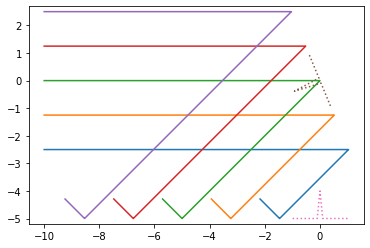

In [434]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Refracting surfaces

In [435]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [-1, -1], 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [436]:
scene.run()

(-10.672847144899352, 4.129790042886396, -2.764513811559352, 3.054790042746397)

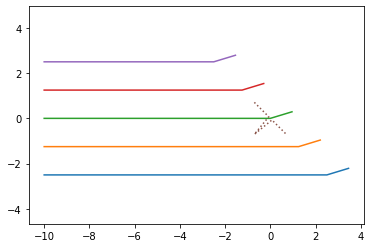

In [437]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

In [438]:
scene.rays

[Ray([ 3.4569429  -2.20972377], [0.9569429  0.29027623]),
 Ray([ 2.2069429  -0.95972377], [0.9569429  0.29027623]),
 Ray([0.9569429  0.29027623], [0.9569429  0.29027623]),
 Ray([-0.2930571   1.54027623], [0.9569429  0.29027623]),
 Ray([-1.5430571   2.79027623], [0.9569429  0.29027623])]

In [439]:
scene.rays[0].angle

0.2945154851081369

In [440]:
# Compare to Snell's (algebra in Xournal)
rad(45) - np.arcsin(1/1.5*np.sin(rad(45)))

0.29451548510813697

# A glass slab

In [441]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [-1, 0], 1, 1.5),
                two_d_tracer.RefractiveSurface([2,0], [1, 0], 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [442]:
scene.rays[0].angle

-0.4636476090008061

In [443]:
np.arcsin(1/1.5*np.sin(scene.rays[0].angle))

-0.30274595162300433

In [444]:
scene.step()
scene.propagate(1e-14)
print(scene.rays[0].angle)
scene.step()
scene.propagate(1e-14)
scene.step()

-0.30274595162300433


(-5.4, 3.4, -6.500504075207105, 2.9285954321527194)

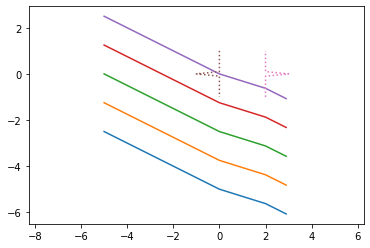

In [445]:
fig, ax = plt.subplots()
scene.plot(ax)   
ax.axis("equal")

In [421]:
scene.rays[0].angle

-0.463647609000806

# Retroreflector

In [422]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0.1,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,2], [1, 1], 1, 1.5),
                two_d_tracer.RefractiveSurface([0,-2], [1, -1], 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [423]:
scene.run()

(-5.345, 2.244999999999999, -2.9778174593052023, 2.9778174593052023)

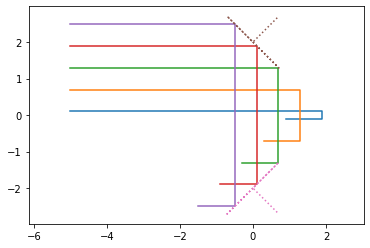

In [424]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [425]:
scene.rays

[Ray([ 0.9 -0.1], [-1.  0.]),
 Ray([ 0.3 -0.7], [-1.  0.]),
 Ray([-0.3 -1.3], [-1.  0.]),
 Ray([-0.9 -1.9], [-1.  0.]),
 Ray([-1.5 -2.5], [-1.  0.])]

# Ray canvas

In [426]:
canvas = two_d_tracer.RayCanvas([0,-3], [0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [1, 1], 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [427]:
scene.run()

In [428]:
canvas

RayCanvas([0, -3], [0. 1.]): [2.5, 1.2499999999999996, 6.66133814775094e-16, -1.2499999999999991, -2.4999999999999987]

(-5.375, 2.875, -4.32500000021, 2.82500000001)

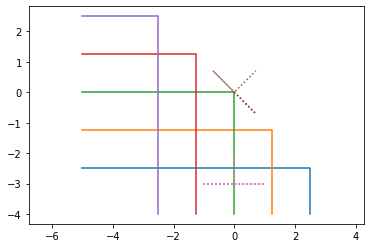

In [429]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Sphere

In [607]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, 1, 1.5),two_d_tracer.ReflectiveSphere([8,0], 2.5, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [608]:
scene.run()
scene.propagate(2)

<IPython.core.display.Javascript object>


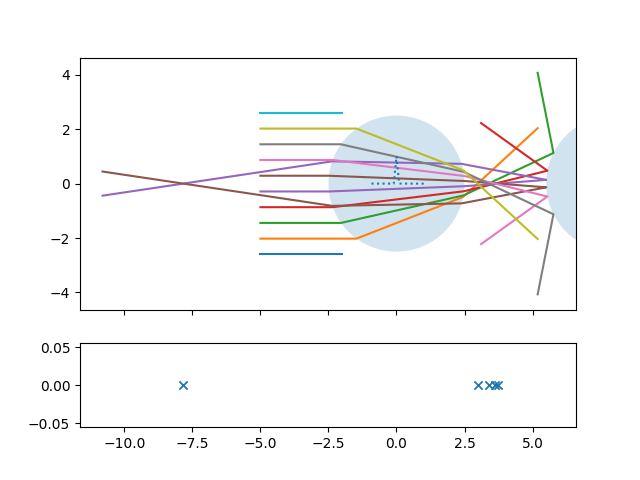

(-11.630301494360825, 6.596707329560326, -4.476850968607872, 4.476850968607868)

In [609]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")